In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('wine.data', header=None)

In [3]:
"""数据分割训练集测试集 并标准化单位方差"""

'数据分割训练集测试集 并标准化单位方差'

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                    stratify=y,
                    random_state=0)

In [7]:
# 标准化特征数

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X_train_std = sc.fit_transform(X_train)

In [11]:
X_test_std = sc.transform(X_test)

In [12]:
"""
第二步 构造协方差矩阵
"""

'\n第二步 构造协方差矩阵\n'

In [13]:
# 通过Numpy的linalg.eig函数获得协方差矩阵的特征向量和特征值
#协方差矩阵 sigma = X*XT dxd 

In [14]:
# 矩阵A的特征向量a及特征值l A*a = l*a

In [15]:
import numpy as np

In [16]:
cov_mat = np.cov(X_train_std.T) 
# np.cov 计算标准化数据的协方差矩阵

In [17]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [18]:
# 宗方差和解释方差

In [19]:
# 对特征值降序排列找出前k个最重要的特征向量
# 通过特征值的方差解释比 NumPy的cumsum函数计算出解释方差和 用matplotlib的step函数绘图

In [20]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
        label='cumculative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal componet index')

Text(0.5, 0, 'Principal componet index')

In [21]:
# 特征变换 
"""
1. 选择与前k个特征值相对应的特征向量，k为新特征子空间的维数（k<=d)
2. 用前k个特征向量构造投影矩阵W
3. 用投影矩阵W变换d维输入数据集X以获得新的k维特征子空间
"""

'\n1. 选择与前k个特征值相对应的特征向量，k为新特征子空间的维数（k<=d)\n2. 用前k个特征向量构造投影矩阵W\n3. 用投影矩阵W变换d维输入数据集X以获得新的k维特征子空间\n'

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

In [24]:
y_train

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2])

In [25]:
X_train_std.shape

(124, 13)

In [26]:
X_train_std[y_train==1].shape

(41, 13)

In [27]:
# 线性判别分析LDA 
# 与主成分分析PCA比较
#                pca 试图找到数据集中最大方差的正交成分轴 无监督学习
                #LDA 寻找和优化具有可分性的特征子空间 有监督学习
"""
线性判别分析的内部逻辑
    1 标准化d维数据集
    2 计算每个类的d维均值向量
    3 构建跨类的散布矩阵Sb类内部的散布矩阵Sw。
    4 矩阵Sw-1SB计算特征向量和对应的特征值
    5 按特征值降序排列米并对相应的特征向量排序
    6 选择对应与k个最大特征值的特征向量， 构建dxk维变换矩阵W，特征向量为该矩阵的列
    7 把变换矩阵W投射到新的特征子空间
"""

'\n线性判别分析的内部逻辑\n    1 标准化d维数据集\n    2 计算每个类的d维均值向量\n    3 构建跨类的散布矩阵Sb类内部的散布矩阵Sw。\n    4 矩阵Sw-1SB计算特征向量和对应的特征值\n    5 按特征值降序排列米并对相应的特征向量排序\n    6 选择对应与k个最大特征值的特征向量， 构建dxk维变换矩阵W，特征向量为该矩阵的列\n    7 把变换矩阵W投射到新的特征子空间\n'

In [28]:
#计算散布矩阵

In [29]:
np.set_printoptions(precision=4)

In [30]:
mean_vecs = []

In [31]:
for label in range(1, 4):
    mean_vecs.append(np.mean(
                X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [32]:
d = 13 # 特征参数数量

In [33]:
S_W = np.zeros((d, d))

In [34]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

In [35]:
print('Within-class scatter matrix: %sx%s' %(
        S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [36]:
print('Class label distribution: {}'.format(np.bincount(y_train)[1:]))

Class label distribution: [41 50 33]


In [37]:
# 计算类间散布矩阵S_B

In [38]:
mean_overall = np.mean(X_train_std, axis=0)

In [39]:
d = 13

In [40]:
S_B = np.zeros((d, d))

In [41]:
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
               (mean_vec - mean_overall).T)

In [42]:
# 求解Sw-1*Sb的广义特征值

In [43]:
eigen_vals, eigen_vecs =\
            np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# eigen_vals 特征值
# eigen_vecs 特征向量

In [44]:
# 按降序对特征值排列

In [45]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

In [46]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

In [47]:
print("Eigenvalues in descending order:\n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

8.262493673957486
4.225659486916682
1.1047740724504602e-15
9.035472024953672e-16
7.057013826108465e-16
7.057013826108465e-16
6.538058812044429e-16
5.978728698414845e-16
2.2529657982265116e-16
2.251395964236803e-16
2.251395964236803e-16
2.7648901631586978e-17
0.0


In [48]:
eigen_pairs[0][1].shape

(13,)

In [49]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

In [50]:
W

array([[-0.1586, -0.4077],
       [ 0.0984, -0.1821],
       [-0.0156, -0.3473],
       [ 0.1588,  0.3095],
       [-0.0207, -0.064 ],
       [ 0.1884,  0.0733],
       [-0.7153,  0.3034],
       [-0.0798, -0.0009],
       [ 0.0074,  0.0716],
       [ 0.3448, -0.2808],
       [-0.0254,  0.244 ],
       [-0.3192, -0.0459],
       [-0.4054, -0.5806]])

In [51]:
# X' = XW

In [52]:
X_train_lda = X_train_std.dot(W)

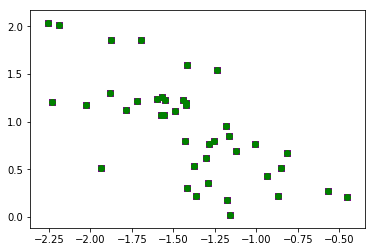

In [54]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==1, 0],
               X_train_lda[y_train==1, 1] * (-1),
               c=c, label=1, marker=m)
plt.show()

In [55]:
# 用scikit—learn实现LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [57]:
lda = LDA(n_components=2)

In [58]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [59]:
# 逻辑回归分类器在LDA变换后如何处理低维训练集

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
lr = lr.fit(X_train_lda, y_train)

/home/ishikawa407/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ishikawa407/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [65]:
"""
plot_decision_regions函数绘制新训练感知器的模型决策区
"""
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolutions=0.02):
    # resolutions 解析度 即坐标精度
    
    # setup marker generator and color map 标记生成器和颜色的映射
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface 绘制决策面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # np.meshgrid 利用矩阵来生成网格点矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        # X[y == cl, 0] X与y的列数必须一致 y==cl 为相等的行索引
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        # X[y == cl, 0] X与y的列数必须一致 y==cl 为相等的行索引
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
        

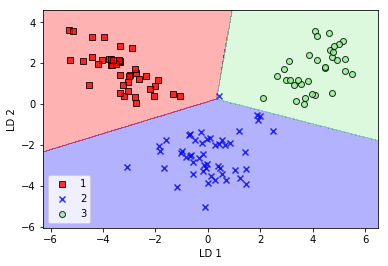

In [67]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [68]:
X_test_lda = lda.transform(X_test_std)

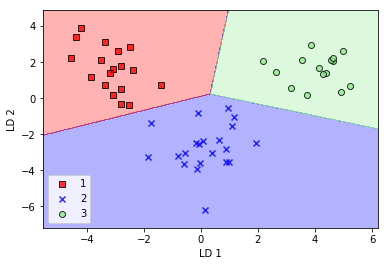

In [69]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [1]:
# 实现核主成分分析

In [3]:
from scipy.spatial.distance import pdist, squareform

In [4]:
from scipy import exp

In [5]:
from scipy.linalg import eigh

In [6]:
import numpy as np

In [ ]:
def  rbf_kernel_pca(X, gamma, n_compoments):
    """
    RBF kernel PCA implementation.
    
    Parameters
    -----------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
        
    n_compoments: int
        Number of principal components to return
    
    Returns
    ----------
    X_pc: {Numpy ndarray}, shape = [n_samples, n_features]
        Projected dataset
        
    """
    # Calcultate pairwise squared Euclidean distances
    # in the MxN dimensional dataset. 计算成对平方欧几里得常数
    sq_dists = pdist(X, 'sqeuclidean')
    